Major Libraries

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Regular expression cleaning library
import re

Special Libraries

In [122]:
import sklearn
import pyLDAvis
import pyLDAvis.lda_model

import nltk
nltk.download('punkt')
nltk.download('stopwords')

#import work_tokenize 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

#Perform Sentiment analysis for each review
from textblob import TextBlob

#Text Modelling libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#Cloud visualization library
from wordcloud import WordCloud


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eniha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eniha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


DATA ANALYSIS

In [123]:
#Load review dataset
reviews = pd.read_csv('c:\\Users\\eniha\\Downloads\\british airways/British_Airways_Review.csv')

#First few rows
reviews.head()

,Unnamed: 0,reviews
0,0,First time using BA business class but we ...
1,1,Extremely rude ground service. We were non-...
2,2,My son and I flew to Geneva last Sunday fo...
3,3,For the price paid (bought during a sale) ...
4,4,Flight left on time and arrived over half ...


In [124]:
#cleaning reviews to remove special characters
clean_review = [re.sub(r'[^a-zA-Z\s]', '', review) for review in reviews['reviews']]

In [16]:
#Cleaned reviews
clean_review

['    First time using BA business class but we were pleased with the service received No one was waiting at check inbag drop and through security in  minutes We used the lounge in the b gates area which we found quiet with plenty of food and drink on offer Boarding was quick and the cabin was on a xx layout with  seats although there was a larger bc cabin behind that had about  seats Again food and drinks were plenty full and good quality Service from the cabin crew was excellent and the cabin manager Lauren even made up a birthday card when she found out it was my wifes special birthday Departed early and arrived at JFK early as well The only thing that I disliked was paying  each to select our seats and no free wifi',
 '   Extremely rude ground service We were nonrev flying and London was our connectionlayover Gate agent was extremely rude and forced me to check my carry on suitcase with the explanation that it was oversized However when I put it in the sizer it fit perfectly withou

SENTIMENT ANALYSIS

In [125]:
#Tokenize words for Sentiment Analysis
tokenized_reviews = [word_tokenize(review.lower()) for review in clean_review]


#Filter tokenized reviews for common words that won't contribute to analysis
stop_words = set(stopwords.words('english'))

filtered_reviews = [[word for word in tokens if word not in stop_words] for tokens in tokenized_reviews]

In [126]:
#Sentiment Scores
sentiment_scores = [TextBlob(" ".join(tokens)).sentiment.polarity for tokens in filtered_reviews]

sentiment_scores



[0.24931972789115647,
 0.19083333333333333,
 -0.05958049886621316,
 0.11987179487179489,
 -0.008424908424908426,
 0.046753246753246755,
 0.14268353174603174,
 -0.05012561842918988,
 -0.058994708994708975,
 0.2783333333333333,
 -0.11433333333333336,
 -0.038095238095238106,
 0.10170391623879996,
 0.05333333333333336,
 0.06995454545454546,
 0.029720279720279727,
 0.20307553143374035,
 -0.1416666666666667,
 0.23333333333333334,
 0.1273809523809524,
 0.17946212121212116,
 0.1404166666666667,
 0.020833333333333336,
 -0.013025210084033607,
 0.36083333333333334,
 -0.4375,
 -0.09270833333333334,
 -0.005411255411255412,
 0.4200000000000001,
 -0.04821428571428571,
 0.006944444444444438,
 0.1408333333333333,
 0.1138888888888889,
 0.13541666666666666,
 -0.2472222222222222,
 0.08844696969696969,
 0.35,
 0.08333333333333334,
 0.011111111111111117,
 0.03472222222222223,
 -0.07152777777777779,
 0.1309288537549407,
 0.4489417989417989,
 0.28814102564102567,
 -0.050151515151515155,
 0.32023809523809516,


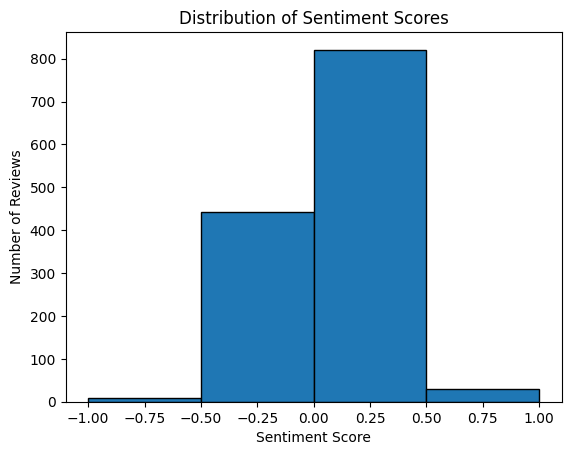

In [127]:
#Sentiment Score histogram
plt.hist(sentiment_scores, bins=[-1, -0.5, 0, 0.5, 1], edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiment Scores')
plt.show()

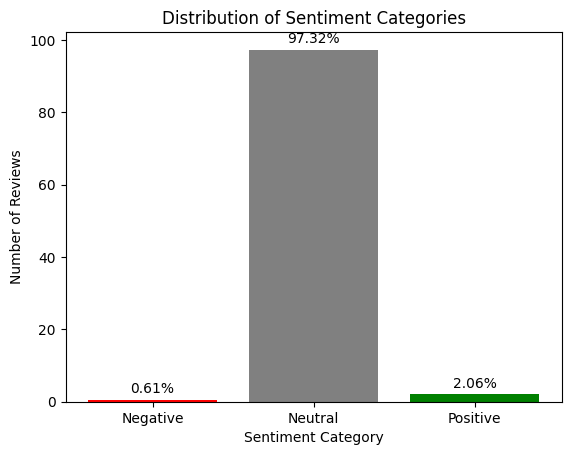

In [146]:
#Sentiment Score barchart
negative = sum(1 for score in sentiment_scores if score < -0.5)
neutral = sum(1 for score in sentiment_scores if score -0.5 <= score <= 0.5)
positive = sum(1 for score in sentiment_scores if score > 0.5)

total_reviews= negative + neutral + positive
sentiment_categories = ['Negative', 'Neutral', 'Positive']

negative_percentage = (negative / total_reviews) * 100
neutral_percentage = (neutral / total_reviews) * 100
positive_percentage = (positive / total_reviews) * 100

sentiment_count = [negative_percentage, neutral_percentage, positive_percentage]

plt.bar(sentiment_categories, sentiment_count, color=['red', 'grey', 'green'])
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiment Categories')

for i, value in enumerate(sentiment_count):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom')

plt.show()

TOPIC MODELLING

In [129]:
#Count number of features
vectorizer = CountVectorizer(max_features = 1000, stop_words='english')

#Data is vectorized
X = vectorizer.fit_transform(clean_review)

#Identify top 5 topics
lda = LatentDirichletAllocation(n_components = 5, random_state=12)

#lda transformation of vectorized data 
topics = lda.fit_transform(X)


In [136]:
#Get feature words from the CountVectorizer
feature_names = vectorizer.get_feature_names_out()

#Get the topic-word distribution (where each row corresponds to a topic)
topic_word_distribution = lda.components_

#Get the document-topic distribution (where each row corresponds to a document)
document_topic_distribution = topics


In [137]:
feature_names

array(['able', 'absolutely', 'accept', 'acceptable', 'accepted', 'access',
       'accommodation', 'account', 'actually', 'add', 'additional',
       'address', 'adequate', 'advance', 'advised', 'afternoon', 'age',
       'agent', 'ago', 'ahead', 'air', 'aircraft', 'airline', 'airlines',
       'airplane', 'airport', 'airways', 'aisle', 'allow', 'allowance',
       'allowed', 'alternative', 'amazing', 'american', 'amsterdam',
       'angeles', 'announced', 'announcement', 'answer', 'anymore',
       'apart', 'apology', 'app', 'appalling', 'apparently', 'appeared',
       'appreciated', 'april', 'area', 'arrival', 'arrivals', 'arrive',
       'arrived', 'arriving', 'ask', 'asked', 'asking', 'assistance',
       'athens', 'atlantic', 'attempt', 'attendant', 'attendants',
       'attention', 'attentive', 'attitude', 'august', 'available',
       'average', 'avios', 'avoid', 'away', 'awful', 'ba', 'baby', 'bad',
       'badly', 'bag', 'baggage', 'bags', 'bangkok', 'bar', 'bas',
       'bas

In [138]:
topic_word_distribution

array([[ 3.04572813, 18.48953056,  4.73958102, ...,  0.20265736,
        12.80345463,  0.48454285],
       [ 9.93467005, 14.10982881,  3.60757792, ...,  0.34130272,
         0.20447375,  6.09731124],
       [45.38355781,  0.21127596,  0.20282528, ...,  7.16370968,
         0.77465032, 13.95812898],
       [19.20438904,  6.53653411,  0.21205852, ..., 14.08982138,
         5.01522942,  1.47491555],
       [14.43165497, 12.65283055, 12.23795726, ...,  0.20250886,
         0.20219188,  1.98510138]])

In [139]:
document_topic_distribution

array([[0.003803  , 0.19349851, 0.00385256, 0.79499835, 0.00384757],
       [0.00420204, 0.00422378, 0.66446835, 0.32293111, 0.00417473],
       [0.0853728 , 0.30397457, 0.60495062, 0.00283023, 0.00287178],
       ...,
       [0.18509358, 0.00373014, 0.09806825, 0.7093711 , 0.00373693],
       [0.00342818, 0.84610933, 0.00338291, 0.14358748, 0.0034921 ],
       [0.00525626, 0.97885724, 0.00528117, 0.0053069 , 0.00529843]])

In [140]:
#Top 10 words for each topics
for topic_idx, topic in enumerate(topic_word_distribution):
    top_words_idx = topic.argsort()[:-10 -1:1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")
    

Topic 1: gates, munich, galleries, improvement, delhi, reference, mixed, spacious, european, expenses, layover, reasonably, suitcase, weather, claim, kong, hong, white, range, stuff, quiet, desks, welcoming, confirmed, lovely, cases, result, replacement, accommodation, quick, dish, bedding, responsibility, wines, schedule, office, arriving, chaotic, counter, north, organised, suites, france, december, pick, purchase, airplane, handled, loaded, employees, paris, expectations, mistake, manchester, professional, filled, temperature, fast, tokyo, fresh, ahead, glass, laptop, message, fantastic, refused, iberia, slightly, ready, wonderful, soft, information, rd, carriers, tasty, beef, fact, concorde, passes, finished, enjoyable, gate, slow, immigration, issued, announcement, champagne, february, dessert, canceled, deck, showing, children, lines, lunch, department, process, step, correct, young, says, members, sadly, juice, fairly, group, priority, attentive, passport, wine, ordered, schedul

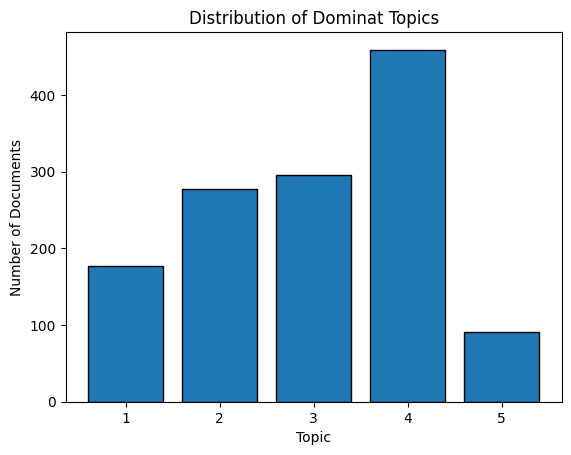

In [134]:
dominant_topics = document_topic_distribution.argmax(axis=1)


plt.hist(dominant_topics + 1, bins=np.arange(1, lda.n_components + 2) - 0.5, edgecolor= 'black', rwidth=0.8)
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.title('Distribution of Dominat Topics')
plt.show()

In [132]:
#Top 5 dominant Topic for each document
for doc_idx, doc in enumerate(document_topic_distribution):
    dominant_topic = doc.argmax()
    top_words_idx_dominant = topic_word_distribution[dominant_topic].argsort()[:-5 - 1:-1]
    top_words_dominant = [feature_names[i] for i in top_words_idx_dominant]

    print(f"Document {doc_idx + 1}: Dominant Topic = {dominant_topic + 1}, Top Words: {', '.join(top_words_dominant)}")

Document 1: Dominant Topic = 4, Top Words: flight, good, crew, food, cabin
Document 2: Dominant Topic = 3, Top Words: flight, british, airways, ba, london
Document 3: Dominant Topic = 3, Top Words: flight, british, airways, ba, london
Document 4: Dominant Topic = 4, Top Words: flight, good, crew, food, cabin
Document 5: Dominant Topic = 2, Top Words: flight, ba, class, business, airways
Document 6: Dominant Topic = 4, Top Words: flight, good, crew, food, cabin
Document 7: Dominant Topic = 4, Top Words: flight, good, crew, food, cabin
Document 8: Dominant Topic = 2, Top Words: flight, ba, class, business, airways
Document 9: Dominant Topic = 1, Top Words: ba, seat, seats, service, flight
Document 10: Dominant Topic = 2, Top Words: flight, ba, class, business, airways
Document 11: Dominant Topic = 3, Top Words: flight, british, airways, ba, london
Document 12: Dominant Topic = 3, Top Words: flight, british, airways, ba, london
Document 13: Dominant Topic = 4, Top Words: flight, good, cre

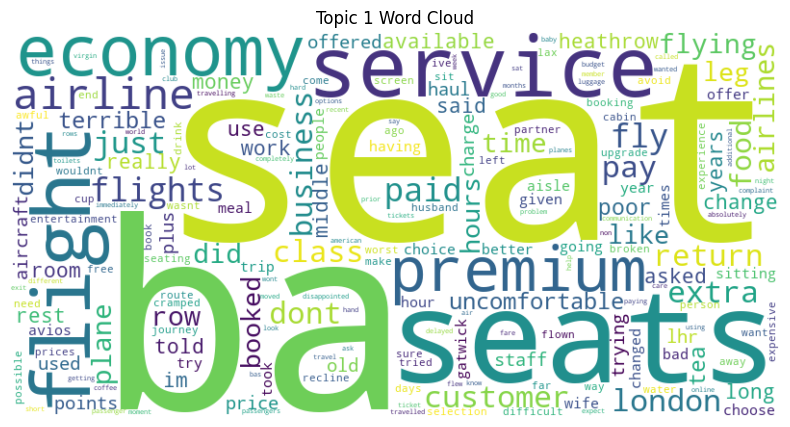

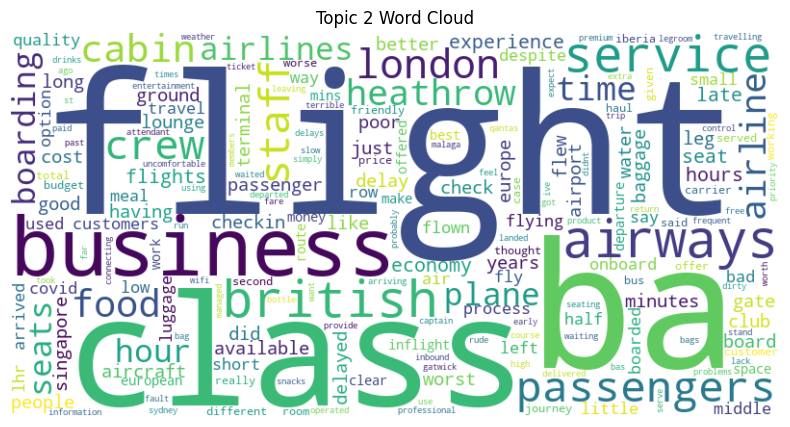

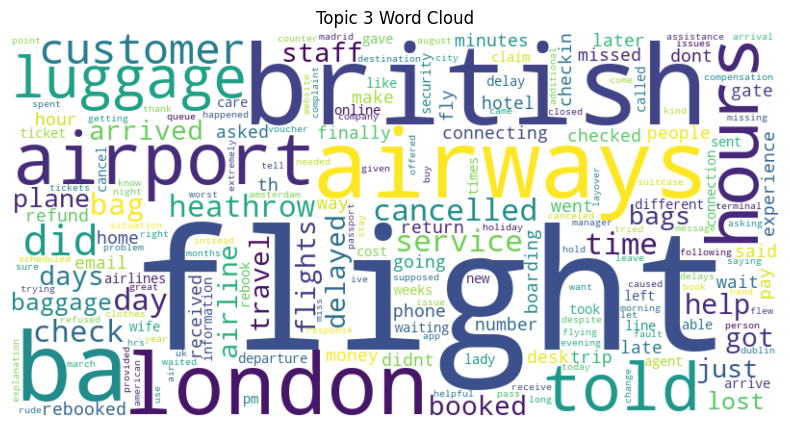

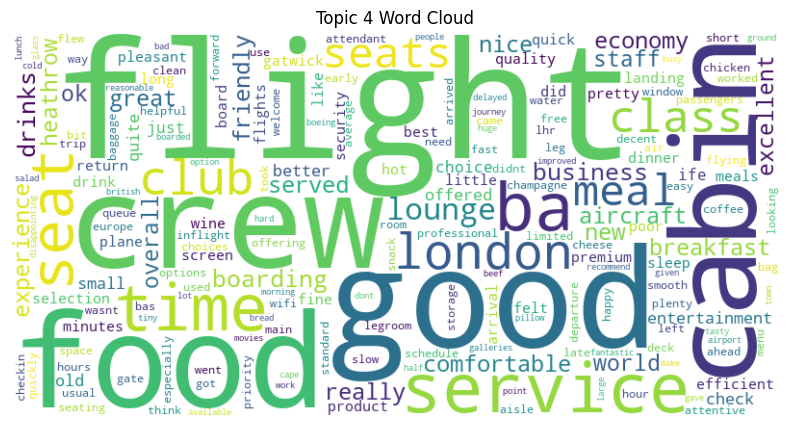

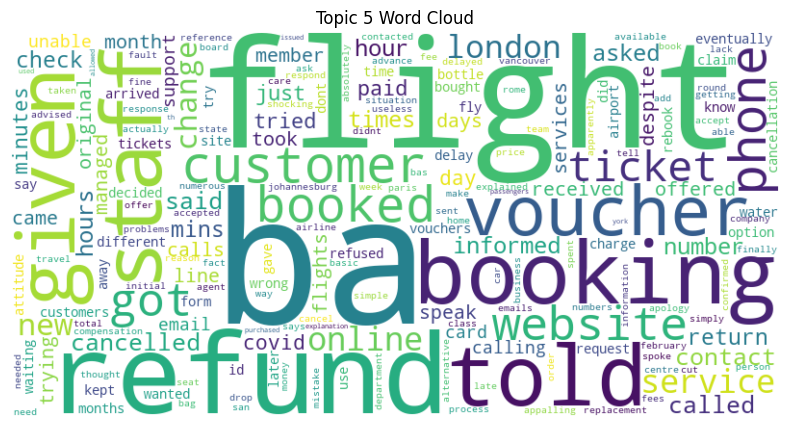

In [135]:
#Cloud Visualization of word distribution for each Topic 
for i in range(min(5, lda.n_components)):
    word_weights = dict(zip(feature_names, topic_word_distribution[i]))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_weights)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {i + 1} Word Cloud')
    plt.show()
    

In [142]:
#Visualization for Topic distribution, word relevance adn document distribution

vis = pyLDAvis.lda_model.prepare(lda, X, vectorizer, sort_topics=False)
pyLDAvis.display(vis)

